# Instalando libs necessárias

In [1]:
!pip install graphviz==0.9
!pip install pydot
!pip install seaborn==0.9.0

!apt-get install graphviz

  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 215kB 2.8MB/s 
  Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


# Carregando os dados

In [0]:
import pandas as pd

In [0]:
 carros_df = pd.read_csv("https://raw.githubusercontent.com/SrDiegoH/DataScience/master/machine-learning-otimizacao-de-modelos-atraves-de-hiperparametros/machine-learning-carros-simulacao.csv")
 carros_df = carros_df.drop(columns=["Unnamed: 0"], axis=1)

In [4]:
carros_df.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


# Situação em que as classes estão ordenadas

Simulando situação com o dataframe

In [5]:
dados_ordenados = carros_df.sort_values("vendido", ascending=True)

x_ordenado = dados_ordenados[["preco", "idade_do_modelo","km_por_ano"]]
y_ordenado = dados_ordenados["vendido"]

dados_ordenados.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [0]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

Gerando numero aleatorio utilizando uma seed para ser replicavel

In [0]:
SEED = 301

np.random.seed(SEED)

## Montando o modelo com DummyClassifier

In [0]:
modelo = DummyClassifier()

In [0]:
results = cross_validate(modelo, x_ordenado, y_ordenado, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

print("Acurácia utilizando dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Acurácia utilziando dummy stratified, 10 = [49.79, 53.45]


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


## Montando o modelo com DecisionTreeClassifier

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

In [0]:
modelo = DecisionTreeClassifier(max_depth=2)

In [11]:
results = cross_validate(modelo, x_ordenado, y_ordenado, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

print("Acurácia utilizando cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Acurácia utilizando cross validation, 10 = [73.83, 77.73]


## Agora gerando os dados de forma aleatória

In [12]:
carros_df['modelo'] = carros_df.idade_do_modelo + np.random.randint(-2, 3, size=10000)
carros_df.modelo = carros_df.modelo + abs(carros_df.modelo.min()) + 1
carros_df.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,22
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,12
3,95276.14,0,3,43167.32682,3
4,117384.68,1,4,12770.11290,4


Função simples para exibir os resultados:

In [0]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100

  print(f"Acurácia média {media.round(3)}")
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

Montando pipeline com StandardScaler e SVC

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

In [0]:
scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao', scaler), ('estimador', modelo)])

Adicionando pipeline ao GroupKFold e validando 

In [16]:
cv = GroupKFold(n_splits = 10)

results = cross_validate(pipeline, x_ordenado, y_ordenado, cv=cv, groups=carros_df.modelo, return_train_score=False)
imprime_resultados(results)

Acurácia média 76.558
Intervalo [74.94, 78.17]


Agora analisando como o modelo se comporta com novos grupos

In [17]:
cv = GroupKFold(n_splits = 10)

modelo = DecisionTreeClassifier(max_depth=2)

results = cross_validate(modelo, x_ordenado, y_ordenado, cv=cv, groups=carros_df.modelo, return_train_score=False)
imprime_resultados(results)

Acurácia média 75.786
Intervalo [73.37, 78.21]


Mostrando rede com DecisionTreeClassifier

In [0]:
from sklearn.tree import export_graphviz
import graphviz

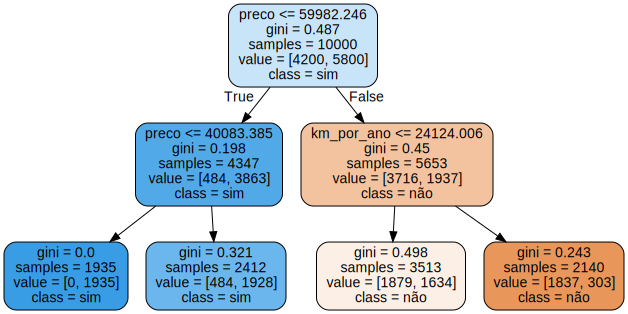

In [19]:
modelo.fit(x_ordenado, y_ordenado)

features = x_ordenado.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=["não", "sim"], feature_names=features)
graph = graphviz.Source(dot_data)
graph

Novamente, analisando como o modelo se comporta com novos grupos (maior profundidade)

In [20]:
cv = GroupKFold(n_splits = 10)

modelo = DecisionTreeClassifier(max_depth=3)

results = cross_validate(modelo, x_ordenado, y_ordenado, cv=cv, groups=carros_df.modelo, return_train_score=False)
imprime_resultados(results)

Acurácia média 78.692
Intervalo [76.27, 81.12]


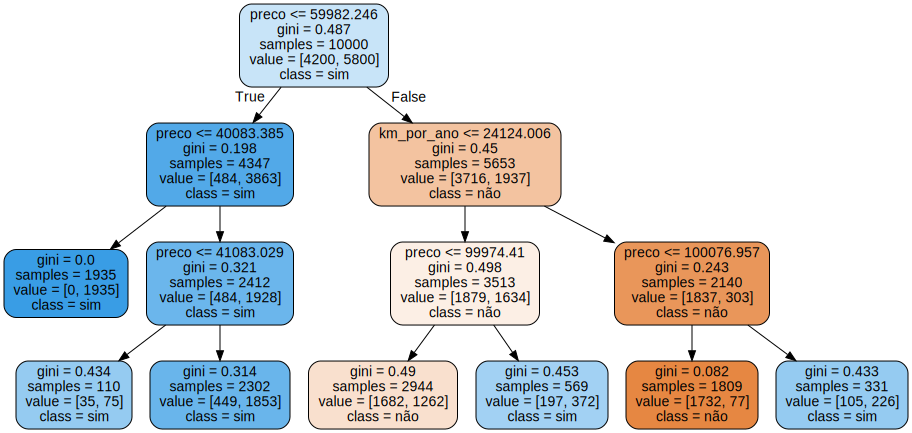

In [21]:
modelo.fit(x_ordenado, y_ordenado)

features = x_ordenado.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, class_names=["não", "sim"], feature_names=features)
graph = graphviz.Source(dot_data)
graph

Mais uma vez, analisando como o modelo se comporta com novos grupos (profundidade bem maior)

In [22]:
cv = GroupKFold(n_splits = 10)

modelo = DecisionTreeClassifier(max_depth=10)

results = cross_validate(modelo, x_ordenado, y_ordenado, cv = cv, groups = carros_df.modelo, return_train_score=False)
imprime_resultados(results)

Acurácia média 77.5
Intervalo [74.46, 80.54]


Podemos ver que a acurácia cai em relação a anterior

# Hiper parâmetros com apenas uma dimensão


In [0]:
def roda_arvore_de_decisao(profundidade):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits=10)

  modelo = DecisionTreeClassifier(max_depth=profundidade)

  results = cross_validate(modelo, x_ordenado, y_ordenado, cv=cv, groups=carros_df.modelo, return_train_score=True)

  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  print(f"Árvore -> profundidade = {profundidade}, treino = {train_score.round(3)}, teste = {test_score.round(3)}")

  return [profundidade, train_score, test_score]

In [24]:
resultados = [roda_arvore_de_decisao(i) for i in range(1,33)]
resultados = pd.DataFrame(resultados, columns= ["max_depth","train","test"])

Árvore -> profundidade = 1, treino = 75.791, teste = 75.786
Árvore -> profundidade = 2, treino = 75.791, teste = 75.786
Árvore -> profundidade = 3, treino = 78.756, teste = 78.692
Árvore -> profundidade = 4, treino = 78.788, teste = 78.672
Árvore -> profundidade = 5, treino = 78.949, teste = 78.603
Árvore -> profundidade = 6, treino = 79.173, teste = 78.392
Árvore -> profundidade = 7, treino = 79.45, teste = 78.311
Árvore -> profundidade = 8, treino = 79.842, teste = 78.201
Árvore -> profundidade = 9, treino = 80.306, teste = 77.994
Árvore -> profundidade = 10, treino = 80.949, teste = 77.408
Árvore -> profundidade = 11, treino = 81.773, teste = 77.085
Árvore -> profundidade = 12, treino = 82.758, teste = 76.53
Árvore -> profundidade = 13, treino = 83.714, teste = 76.379
Árvore -> profundidade = 14, treino = 84.736, teste = 75.977
Árvore -> profundidade = 15, treino = 85.808, teste = 75.582
Árvore -> profundidade = 16, treino = 86.869, teste = 75.04
Árvore -> profundidade = 17, treino 

Plotando profundidades vs treino

In [25]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


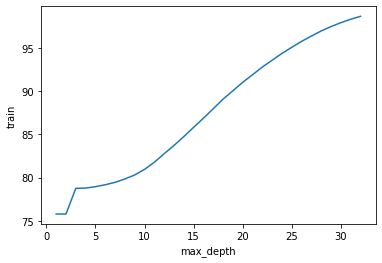

In [26]:
sns.lineplot(x = "max_depth", y = "train", data = resultados)

Plotando profundidades vs test

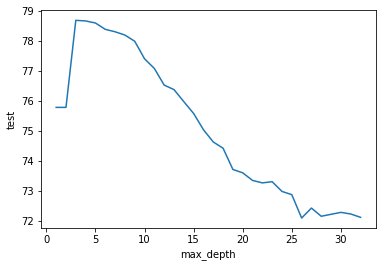

In [27]:
sns.lineplot(x = "max_depth", y = "test", data = resultados)

Como podemos ver, para o treino ficou bom, mas para o teste não... isso ocorre por que ocorreu um overfit (dados viciados para aquela massa)

In [0]:
import matplotlib.pyplot as plt


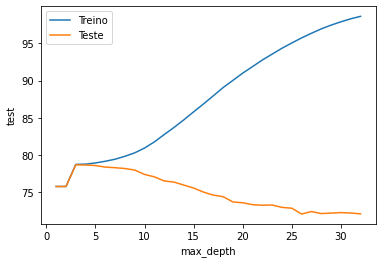

In [29]:
sns.lineplot(x="max_depth", y="train", data=resultados)
sns.lineplot(x="max_depth", y="test", data=resultados)
plt.legend(["Treino", "Teste"])

In [30]:
resultados.sort_values("test", ascending=False).head()

,max_depth,train,test
2,3,78.755702,78.692170
3,4,78.787904,78.672305
4,5,78.949009,78.603140
5,6,79.173472,78.391765
6,7,79.450204,78.310659


# Hiper parâmetros com duas dimensões




In [0]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)

  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)

  results = cross_validate(modelo, x_ordenado, y_ordenado, cv=cv, groups=carros_df.modelo, return_train_score=True)
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100

  print(f"Árvore -> profundidade = {max_depth}, min_samples_leaf = {min_samples_leaf}, treino = {train_score.round(3)}, teste = {test_score.round(3)}")
  
  return [max_depth, min_samples_leaf, train_score, test_score]

In [0]:
def busca():
  resultados = []

  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)

  resultados = pd.DataFrame(resultados, columns=["max_depth","min_samples_leaf","train","test"])
  
  return resultados

In [40]:
resultados = busca()

Árvore -> profundidade = 1, min_samples_leaf = 32, treino = 75.791, teste = 75.786
Árvore -> profundidade = 1, min_samples_leaf = 64, treino = 75.791, teste = 75.786
Árvore -> profundidade = 1, min_samples_leaf = 128, treino = 75.791, teste = 75.786
Árvore -> profundidade = 1, min_samples_leaf = 256, treino = 75.791, teste = 75.786
Árvore -> profundidade = 2, min_samples_leaf = 32, treino = 75.791, teste = 75.786
Árvore -> profundidade = 2, min_samples_leaf = 64, treino = 75.791, teste = 75.786
Árvore -> profundidade = 2, min_samples_leaf = 128, treino = 75.791, teste = 75.786
Árvore -> profundidade = 2, min_samples_leaf = 256, treino = 75.791, teste = 75.786
Árvore -> profundidade = 3, min_samples_leaf = 32, treino = 78.751, teste = 78.702
Árvore -> profundidade = 3, min_samples_leaf = 64, treino = 78.751, teste = 78.702
Árvore -> profundidade = 3, min_samples_leaf = 128, treino = 78.751, teste = 78.702
Árvore -> profundidade = 3, min_samples_leaf = 256, treino = 78.751, teste = 78.70

In [41]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
11,3,256,78.751263,78.702282
10,3,128,78.751263,78.702282
15,4,256,78.751263,78.702282
14,4,128,78.751263,78.702282
13,4,64,78.751263,78.702282


Correlação entre os dados

In [42]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000,0.000000,0.539739,-0.021405
min_samples_leaf,0.000000,1.000000,-0.413458,0.496230
train,0.539739,-0.413458,1.000000,0.105866
test,-0.021405,0.496230,0.105866,1.000000


Mapa de calor da correlação entre os dados

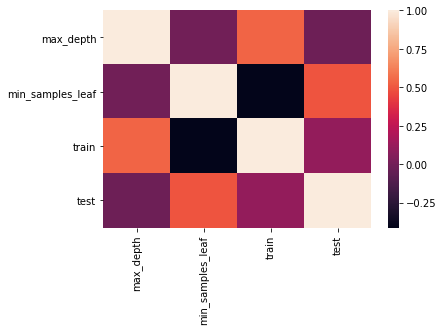

In [43]:
sns.heatmap(corr)

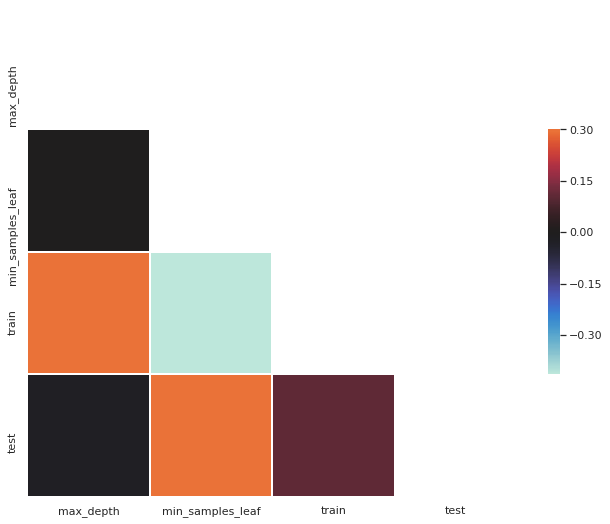

In [57]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Scatter matrix

* https://medium.com/@raghavan99o/scatter-matrix-covariance-and-correlation-explained-14921741ca56

In [0]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3383342ac8>,
      dtype=object)

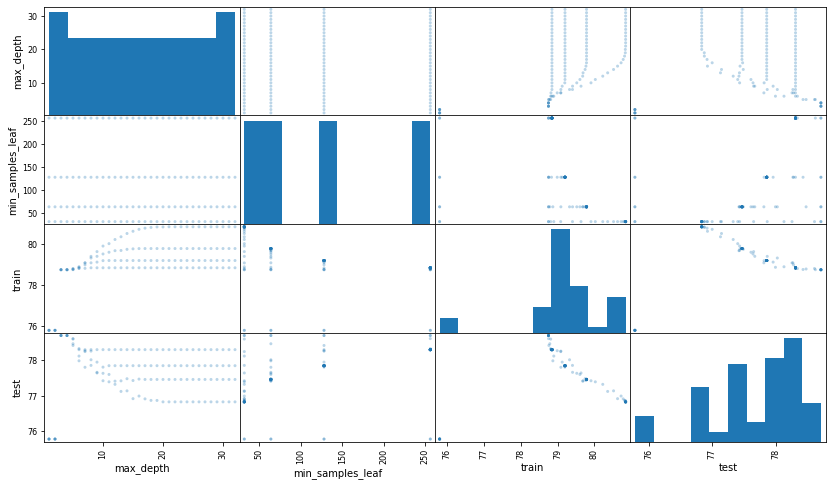

In [47]:
scatter_matrix(resultados, figsize = (14, 8), alpha = 0.3)

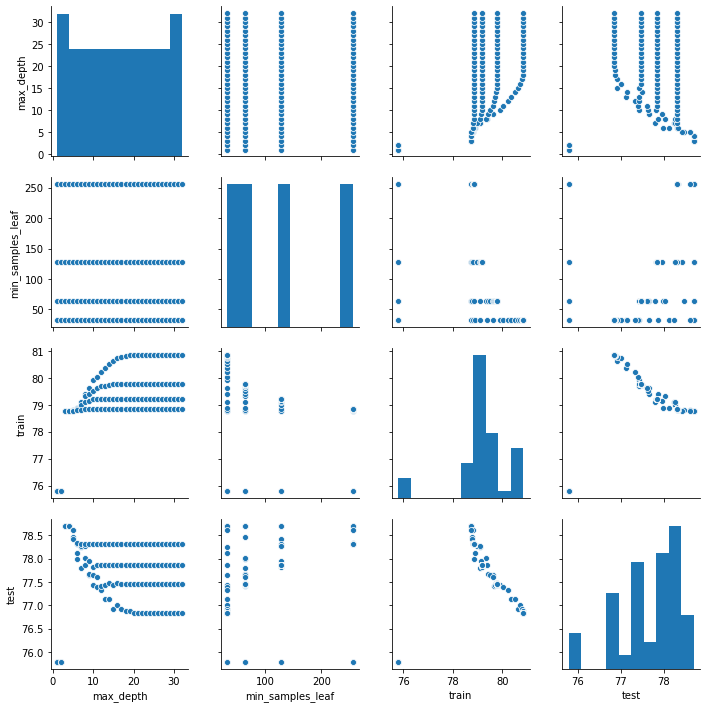

In [48]:
sns.pairplot(resultados)

Alterando min samples leaf

In [0]:
def busca():
  resultados = []

  for max_depth in range(1,33):
    for min_samples_leaf in [128, 192, 256, 512]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  
  resultados = pd.DataFrame(resultados, columns=["max_depth","min_samples_leaf","train","test"])
  return resultados

In [62]:
resultados = busca()

Árvore -> profundidade = 1, min_samples_leaf = 128, treino = 75.791, teste = 75.786
Árvore -> profundidade = 1, min_samples_leaf = 192, treino = 75.791, teste = 75.786
Árvore -> profundidade = 1, min_samples_leaf = 256, treino = 75.791, teste = 75.786
Árvore -> profundidade = 1, min_samples_leaf = 512, treino = 75.791, teste = 75.786
Árvore -> profundidade = 2, min_samples_leaf = 128, treino = 75.791, teste = 75.786
Árvore -> profundidade = 2, min_samples_leaf = 192, treino = 75.791, teste = 75.786
Árvore -> profundidade = 2, min_samples_leaf = 256, treino = 75.791, teste = 75.786
Árvore -> profundidade = 2, min_samples_leaf = 512, treino = 75.791, teste = 75.786
Árvore -> profundidade = 3, min_samples_leaf = 128, treino = 78.751, teste = 78.702
Árvore -> profundidade = 3, min_samples_leaf = 192, treino = 78.751, teste = 78.702
Árvore -> profundidade = 3, min_samples_leaf = 256, treino = 78.751, teste = 78.702
Árvore -> profundidade = 3, min_samples_leaf = 512, treino = 77.524, teste =

In [64]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000,0.000000,0.350197,0.211779
min_samples_leaf,0.000000,1.000000,-0.638294,-0.308284
train,0.350197,-0.638294,1.000000,0.837532
test,0.211779,-0.308284,0.837532,1.000000


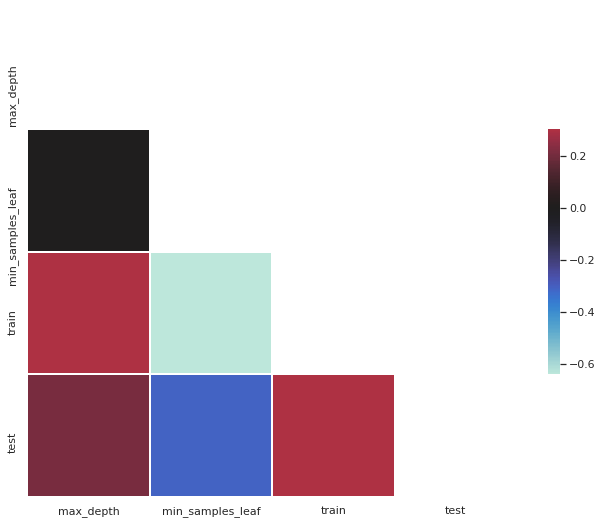

In [66]:
sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [67]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,train,test
14,4,256,78.751263,78.702282
8,3,128,78.751263,78.702282
9,3,192,78.751263,78.702282
10,3,256,78.751263,78.702282
12,4,128,78.751263,78.702282


# Hiper parâmetros com três imensões

In [0]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)

  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
  results = cross_validate(modelo, x_ordenado, y_ordenado, cv=cv, groups = carros_df.modelo, return_train_score=True)
  
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  train_score = results['train_score'].mean() * 100
  test_score = results['test_score'].mean() * 100
  
  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela

In [0]:
def busca():

  resultados = []
  
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      for min_samples_split in [32, 64, 128, 256]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabela)
  
  resultados = pd.DataFrame(resultados, columns= ["max_depth","min_samples_leaf","min_samples_split","train","test", "fit_time", "score_time"])
  return resultados


In [0]:
resultados = busca()

In [73]:
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791178,75.785553,0.005895,0.000991
1,1,32,64,75.791178,75.785553,0.005400,0.001007
2,1,32,128,75.791178,75.785553,0.005298,0.000967
3,1,32,256,75.791178,75.785553,0.005322,0.000968
4,1,64,32,75.791178,75.785553,0.005320,0.001051


In [74]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
max_depth,1.000000,0.000000,0.000000,0.534455,0.036691,0.585427,0.388220
min_samples_leaf,0.000000,1.000000,0.000000,-0.358084,0.403634,-0.520434,-0.272818
min_samples_split,0.000000,0.000000,1.000000,-0.106862,0.162823,-0.066352,-0.064467
train,0.534455,-0.358084,-0.106862,1.000000,0.259870,0.911604,0.549184
test,0.036691,0.403634,0.162823,0.259870,1.000000,-0.051803,-0.047645
fit_time,0.585427,-0.520434,-0.066352,0.911604,-0.051803,1.000000,0.626502
score_time,0.388220,-0.272818,-0.064467,0.549184,-0.047645,0.626502,1.000000


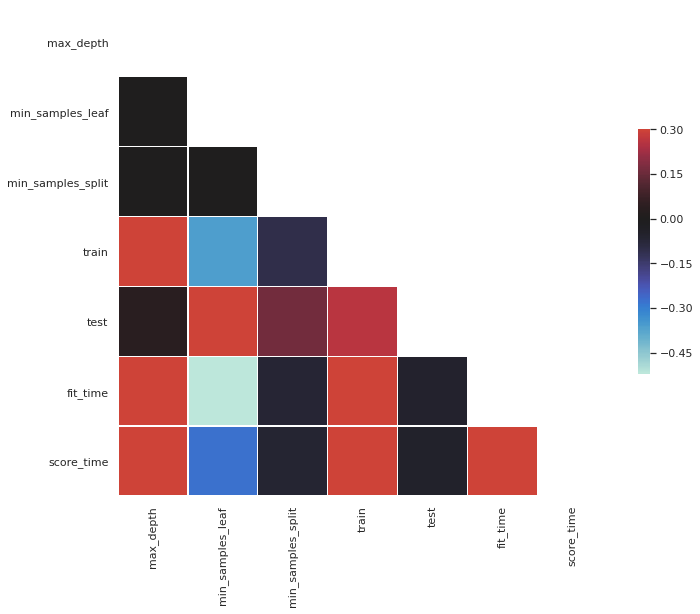

In [75]:
sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [76]:
resultados.sort_values("test", ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
48,4,32,32,78.751263,78.702282,0.012091,0.001012
33,3,32,64,78.751263,78.702282,0.010058,0.000995
52,4,64,32,78.751263,78.702282,0.011966,0.000990
51,4,32,256,78.751263,78.702282,0.012005,0.001012
50,4,32,128,78.751263,78.702282,0.012249,0.001070


# Explorando espaço de hiper parâmetros utilizando GridSearchCV

In [0]:
from sklearn.model_selection import GridSearchCV

In [97]:
espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = GroupKFold(n_splits = 10))

busca.fit(x_ordenado, y_ordenado, groups = carros_df.modelo)

GridSearchCV(cv=GroupKFold(n_splits=10), error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'

In [0]:
resultados = pd.DataFrame(busca.cv_results_)

In [82]:
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010798,0.001151,0.001075,0.000105,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.793634,0.787575,0.763056,0.775531,0.775124,0.79803,0.7923,0.79103,0.806714,0.787234,0.787023,0.01202,1
1,0.010126,0.000138,0.000987,0.000016,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.793634,0.787575,0.763056,0.775531,0.775124,0.79803,0.7923,0.79103,0.806714,0.787234,0.787023,0.01202,1
2,0.010318,0.000810,0.001135,0.000286,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.793634,0.787575,0.763056,0.775531,0.775124,0.79803,0.7923,0.79103,0.806714,0.787234,0.787023,0.01202,1
3,0.010115,0.000205,0.000988,0.000023,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.793634,0.787575,0.763056,0.775531,0.775124,0.79803,0.7923,0.79103,0.806714,0.787234,0.787023,0.01202,1
4,0.010059,0.000098,0.000976,0.000012,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.793634,0.787575,0.763056,0.775531,0.775124,0.79803,0.7923,0.79103,0.806714,0.787234,0.787023,0.01202,1


In [90]:
print(f"Melhores parametros: {busca.best_params_}")
print(f"Melhor pontuação: {busca.best_score_ * 100}")

melhor = busca.best_estimator_
print(f"Melhor Estimador: {melhor}")

Melhores parametros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
Melhor pontuação: 78.70228157349497
Melhor Estimador: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [0]:
from sklearn.metrics import accuracy_score


In [91]:
predicoes = melhor.predict(x_ordenado)
accuracy = accuracy_score(predicoes, y_ordenado) * 100

print(f"Acuráácia para os dados foi {accuracy.round(3)}")

Acuráácia para os dados foi 78.75


Deve-se evitar essa abordagem pois estará sendo otimista

# Evitando vicios nas estimativa

Para evitar uma estimativa com vício nos dados, usamos a tecnica nested cross validation. Esta consiste em no caso de cross validation com busca de hiper parâmetros, fazemos uma nova validação cruzada.

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
scores = cross_val_score(busca, x_ordenado, y_ordenado, cv=GroupKFold(n_splits=10), groups=carros_df.modelo)

O Pandas não suporta nested validation com group k fold, não conseguimos prever o resultado para novos grupos

In [0]:
from sklearn.model_selection import GridSearchCV, KFold

In [101]:
espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_ordenado, y_ordenado)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             par

In [102]:
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010049,0.001066,0.001149,0.000048,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7815,0.7795,0.802,0.79,0.7815,0.7869,0.008375,1
1,0.009215,0.000124,0.001166,0.000132,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7815,0.7795,0.802,0.79,0.7815,0.7869,0.008375,1
2,0.009373,0.000133,0.001197,0.000108,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7815,0.7795,0.802,0.79,0.7815,0.7869,0.008375,1
3,0.009325,0.000160,0.001108,0.000020,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7815,0.7795,0.802,0.79,0.7815,0.7869,0.008375,1
4,0.009186,0.000148,0.001117,0.000033,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7815,0.7795,0.802,0.79,0.7815,0.7869,0.008375,1


In [103]:
scores = cross_val_score(busca, x_ordenado, y_ordenado, cv = KFold(n_splits=5, shuffle=True))
scores

array([0.775 , 0.7965, 0.787 , 0.785 , 0.791 ])

In [0]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100

  print(f"Acurácia média {media.round(2)}")
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [106]:
imprime_score(scores)

Acuráácia média 78.69
Intervalo [77.26, 80.12]


In [108]:
melhor = busca.best_estimator_

print(f"Melhor estimador {melhor}")

Melhor estimador DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


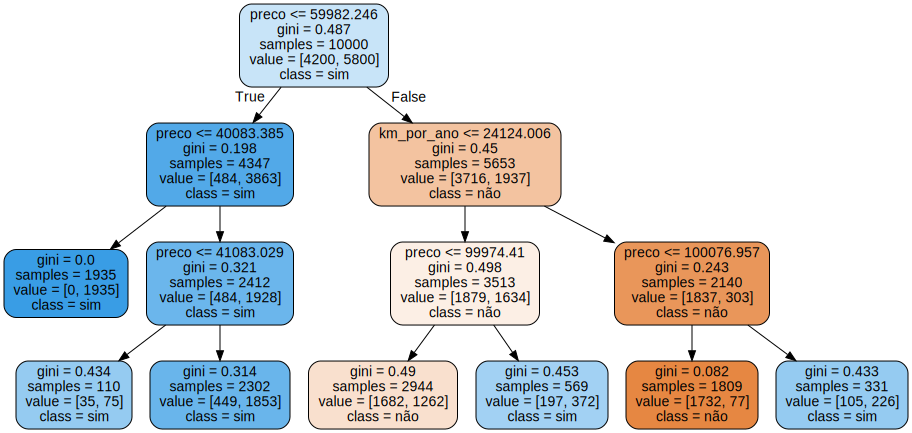

In [109]:
features = x_ordenado.columns

dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não", "sim"],
                          feature_names=features)

graph = graphviz.Source(dot_data)
graph